# 西安酒店评分统计

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
poi_gpd=pd.read_pickle('../data/poiAll_gpd.pkl') #读取已经存储为.pkl格式的POI数据，其中包括geometry字段，为GeoDataFrame地理信息数据，可以通过poi_gpd.plot()迅速查看数据。

df = poi_gpd.reset_index()
df = df[df.level_0 == 'poi_1_hotel']
df = df.dropna(subset = ['detail_info_overall_rating'],axis =0) #删除缺省值
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry
11579,poi_1_hotel,1191,志诚丽柏酒店,34.240030,108.912124,酒店;星级酒店,4.6,376,POINT (108.91212 34.24003)
11580,poi_1_hotel,1194,水晶岛酒店,34.213837,108.893900,酒店;其他,4.4,299,POINT (108.89390 34.21384)
11581,poi_1_hotel,1195,西安高新希尔顿酒店,34.226686,108.894191,酒店;星级酒店,4.6,614,POINT (108.89419 34.22669)
11582,poi_1_hotel,1196,西安海升酒店,34.218452,108.891532,酒店;其他,4.6,264,POINT (108.89153 34.21845)
11583,poi_1_hotel,1197,西安天骊君廷大酒店,34.224739,108.919048,酒店;快捷酒店,4.8,655,POINT (108.91905 34.22474)


In [3]:
df.detail_info_overall_rating.describe()

count    1419.000000
mean        4.004017
std         0.844633
min         0.000000
25%         3.800000
50%         4.300000
75%         4.500000
max         5.000000
Name: detail_info_overall_rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xbb384a8>,
 'caps': [<matplotlib.lines.Line2D at 0xbb39208>,
 'boxes': [<matplotlib.lines.Line2D at 0xbb35c88>],
 'medians': [<matplotlib.lines.Line2D at 0xbb39f28>],
 'fliers': [<matplotlib.lines.Line2D at 0xbb3c5f8>],
 'means': []}

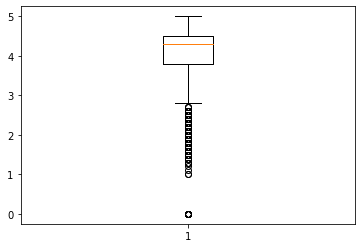

In [4]:
plt.boxplot(df.detail_info_overall_rating)

In [14]:
def frequency_bins(df,bins):
    import pandas as pd
    '''function-频数分布计算'''
    
    #A-组织数据
    column_name=df.columns[0]
    column_bins_name=df.columns[0]+'_bins'
    df[column_bins_name]=pd.cut(x=df[column_name],bins=bins,right=False) #参数right=False指定为包含左边值，不包括右边值。
    df_bins=df.sort_values(by=[column_name]) #按照分割区间排序
    df_bins.set_index([column_bins_name,df_bins.index],drop=False,inplace=True) #以price_bins和原索引值设置多重索引，同时配置drop=False参数保留原列。
    #print(df_bins.head(10))
    
    #B-频数计算
    dfBins_frequency=df_bins[column_bins_name].value_counts() #dropna=False  
    dfBins_relativeFrequency=df_bins[column_bins_name].value_counts(normalize=True) #参数normalize=True将计算相对频数(次数) dividing all values by the sum of values
    dfBins_freqANDrelFreq=pd.DataFrame({'fre':dfBins_frequency,'relFre':dfBins_relativeFrequency})
    #print(dfBins_freqANDrelFreq)
    
    #C-组中值计算
    df_bins["rating"]=df_bins["rating"].astype(float)
    dfBins_median=df_bins.median(level=0)
    dfBins_median.rename(columns={column_name:'median'},inplace=True)
    #print(dfBins_median)
    
    #D-合并分割区间、频数计算和组中值的DataFrame格式数据。
    df_fre=dfBins_freqANDrelFreq.join(dfBins_median).sort_index().reset_index() #在合并时会自动匹配index
    #print(ranmen_fre)
    
    #E-计算频数比例
    df_fre['fre_percent%']=df_fre.apply(lambda row:row['fre']/df_fre.fre.sum()*100,axis=1)
    
    return df_fre
bins=np.arange(0,5.5,0.5) #配置分割区间（组距）   
delicacy_price_df = pd.DataFrame()
delicacy_price_df['rating'] = df.detail_info_overall_rating
poiPrice_fre_50=frequency_bins(delicacy_price_df,bins)    
print(poiPrice_fre_50)


        index  fre    relFre  median  fre_percent%
0  [0.0, 0.5)   10  0.007179     0.0      0.717875
1  [0.5, 1.0)    0  0.000000     NaN      0.000000
2  [1.0, 1.5)   11  0.007897     1.3      0.789663
3  [1.5, 2.0)   41  0.029433     1.7      2.943288
4  [2.0, 2.5)   52  0.037330     2.2      3.732950
5  [2.5, 3.0)   31  0.022254     2.6      2.225413
6  [3.0, 3.5)   80  0.057430     3.1      5.743001
7  [3.5, 4.0)  206  0.147882     3.7     14.788227
8  [4.0, 4.5)  527  0.378320     4.2     37.832017
9  [4.5, 5.0)  435  0.312276     4.6     31.227566


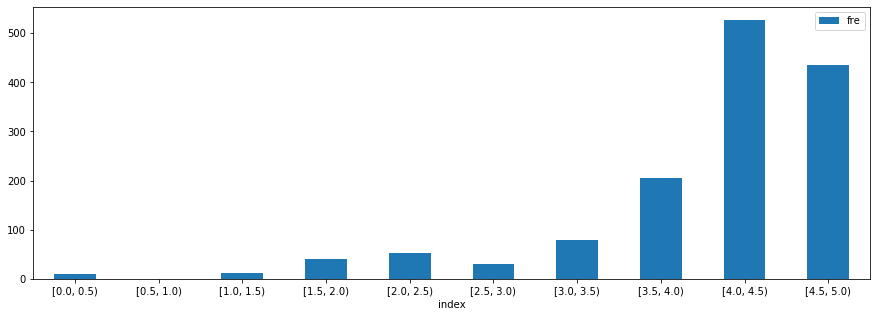

In [15]:
poiPrice_fre_50.loc[:,['fre','index']].plot.bar(x='index',rot=0,figsize=(15,5))